### Handling missing and duplicate values using `pandas`

In [3]:
import pandas as pd

# Sample DataFrame with missing values
df=pd.DataFrame({
    'A':[1,2,None,4],
    'B':[None,2,3,4],
    'C':[1,None,None,4]
})

df.head()

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,NaN
3,4.0,4.0,4.0


In [ ]:
# Drop rows with any missing values
df_cleaned = df.dropna()
df_cleaned.head()

,A,B,C
3,4.0,4.0,4.0


In [6]:
# Replace missing values with a specific value (e.g., 0)
df_filled = df.fillna(0)
df_filled.head()

,A,B,C
0,1.0,0.0,1.0
1,2.0,2.0,0.0
2,0.0,3.0,0.0
3,4.0,4.0,4.0


In [7]:
# Replace missing values with the mean of the column
df_filled = df.fillna(df.mean())
df_filled.head()

,A,B,C
0,1.000000,3.0,1.0
1,2.000000,2.0,2.5
2,2.333333,3.0,2.5
3,4.000000,4.0,4.0


In [10]:
# Create DataFrame with duplicate rows
df = pd.DataFrame({
    'A': [1, 2, 2, 4],
    'B': [5, 6, 6, 8],
    'C': [9, 10, 10, 12]
})  
df.head()

,A,B,C
0,1,5,9
1,2,6,10
2,2,6,10
3,4,8,12


In [11]:
# Remove duplicate rows 
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.head()

,A,B,C
0,1,5,9
1,2,6,10
3,4,8,12


### Handling missing and duplicate values using `numpy`

In [12]:
import numpy as np

# Sample array with missing values
arr = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9]])
arr

array([[ 1.,  2., nan],
       [ 4., nan,  6.],
       [ 7.,  8.,  9.]])

In [13]:
# Identify missing values
missing_mask = np.isnan(arr)
missing_mask

array([[False, False,  True],
       [False,  True, False],
       [False, False, False]])

In [15]:
# Handle missing values by replacing them with a specific value (e.g., 0)
arr_filled = np.where(missing_mask, 0, arr)
arr_filled

array([[1., 2., 0.],
       [4., 0., 6.],
       [7., 8., 9.]])

In [16]:
# Handle missing values by replacing them with the mean of the columns
col_means = np.nanmean(arr, axis=0)

### Handling missing and duplicate values using `scipy`

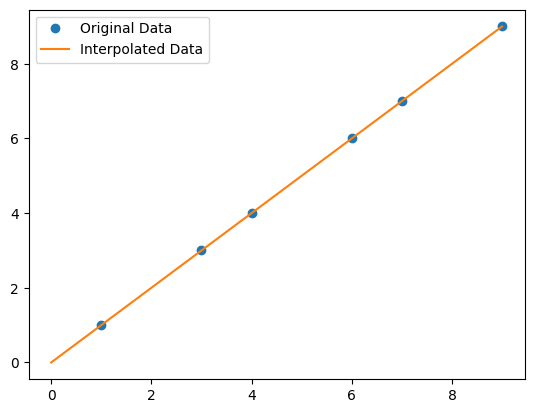

In [22]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Sample array with missing values
x = np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([np.nan,1,np.nan,3,4,np.nan,6,7,np.nan,9])

# Interpolate to fill missing values
mask = ~np.isnan(y)
interp_func = interp1d(x[mask], y[mask], kind='linear', fill_value='extrapolate') # kind can be 'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic'
y_filled = interp_func(x)

# Plot original and filled data
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x, y_filled, '-', label='Interpolated Data')
plt.legend()
plt.show()
